# YLearn Case Study - Bank transaction amount

## Content

1. Summary
1. Dataset
1. Learn Why with default settings
1. Learn Why with causal discovery
1. Learn Why with customized treatment
1. Conclusion

## Summary

In any commercial fields, it is crucial to retain customers and make policies to reduce customer churn, which as reported bring large profit and extra values to the company. A credit department of bank provides multiple services to customers. The policy maker would like to know which services attract customers the most and what characteristics they have in order to develop targeted programs to improve customer retention.

YLearn provides a complete causal problem-solving routine. It first filters tens of important features among numerous variables and then discover the causal relations between these features. Causal model and estimator model are used to identify and estimate the causal effects of interested features respectively. With the help of effect interpreter library, users could visually understand the eatimation process of causal effects. Besides, users are able to manipulate the data to perform counterfactual predictions via whatif function. To be a wise decision maker, the last step is to apply the policy interpreter which provides the optimized solutions to the target outcome. (if set the goal, or set the constrains).

## Data

The bank churn dataset contain the information of around 10,000 customers with about 20 continuos and categorical variables that represent user's characteristics such as attrition_flag, age, gender, edu_level, income_category, card_category, marital status, months_on_book, credit_limit, etc. 
 
The data used in this notebook is synthetically generated, whose feature names are referred to the bank credit customer dataset from Kaggle. However, the feature distributions are self made up and not real. The data generation follows the functions below:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt

from sklearn.model_selection import train_test_split
from ylearn import Why

In [2]:
data = pd.read_csv('data/BankChurners.csv.zip')
cols = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Credit_Limit',   'Total_Trans_Amt' 
     ]
data = data[cols]
data['Credit_Limit'] = data['Credit_Limit'].map(lambda v: v//2000*2000 ).astype('int')
outcome = 'Total_Trans_Amt'

In [3]:
data 

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Trans_Amt
0,45,M,3,High School,Married,$60K - $80K,Blue,39,12000,1144
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,8000,1291
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,2000,1887
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,2000,1171
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4000,816
...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,4000,15476
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4000,8764
10124,44,F,1,High School,Married,Less than $40K,Blue,36,4000,10291
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4000,8395


In [4]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=123)

print('train_data:',train_data.shape)
print('test_data: ',test_data.shape)

train_data: (8101, 10)
test_data:  (2026, 10)


# Learn Why with default settings

## Fitting Why

In [5]:
why=Why(random_state=123)
why.fit(train_data,outcome)

06-28 19:08:56 I ylearn._why.py 451 - infer outcome as regression
06-28 19:08:56 I ylearn._why.py 461 - identify treatment, adjustment, covariate and instrument
06-28 19:08:56 I ylearn.s._transformer.py 132 - preprocessing
06-28 19:08:56 I ylearn.s._transformer.py 134 - scoring
06-28 19:08:57 I ylearn._why.py 575 - identified treatment[classification]: ['Gender', 'Education_Level']
06-28 19:08:57 I ylearn._why.py 587 - infer discrete_treatment=True
06-28 19:08:57 I ylearn._why.py 602 - identified adjustment: None
06-28 19:08:57 I ylearn._why.py 603 - identified covariate: ['Customer_Age', 'Dependent_count', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Credit_Limit']
06-28 19:08:57 I ylearn._why.py 604 - identified instrument: None
06-28 19:08:57 I ylearn._why.py 470 - encode treatment ...
06-28 19:08:57 I ylearn._why.py 480 - preprocess data ...
06-28 19:08:57 I ylearn._why.py 498 - fit estimator for Gender with PermutedTLearner(model=None, args=None, kwargs

Why(discrete_outcome=False, discrete_treatment=True, random_state=123)

## Plot causal graph

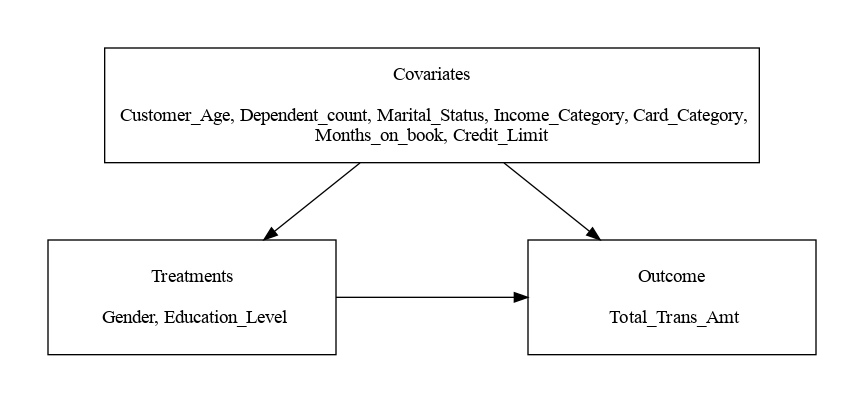

In [6]:
why.plot_causal_graph()

# Inspect causal effect

## See causal effect on train_data

In [7]:
why.causal_effect(control=['M','Unknown'])

mean           min  \
Gender          F vs M                    150.640728 -16716.559356   
Education_Level College vs Unknown          3.368850 -15143.415553   
                Doctorate vs Unknown       37.953171 -15216.600233   
                Graduate vs Unknown        73.801966 -15186.595647   
                High School vs Unknown    302.162672 -14808.233635   
                Post-Graduate vs Unknown   88.867063 -14562.248703   
                Uneducated vs Unknown     117.668287 -14556.268841   

                                                   max          std  
Gender          F vs M                    15422.586961  5272.303141  
Education_Level College vs Unknown        15006.578424  4620.741564  
                Doctorate vs Unknown      14543.609273  4359.105360  
                Graduate vs Unknown       16092.889979  4616.797248  
                High School vs Unknown    15986.310065  4843.194914  
                Post-Graduate vs Unknown  15816.580345  4718.944413  
                Uneducated vs Unknown     15715.583746  4653.251771

## See causal effect on test_data

In [8]:
blue_card_data=test_data[lambda df:df['Card_Category']=='Blue']
why.causal_effect(blue_card_data)

mean           min  \
Gender          M vs F                   -323.385249 -15653.580825   
Education_Level Doctorate vs College      -25.318905 -14972.803664   
                Graduate vs College       310.463265 -15041.965445   
                High School vs College    489.616982 -15157.848158   
                Post-Graduate vs College  266.942417 -15347.589263   
                Uneducated vs College     353.880432 -14976.598399   
                Unknown vs College        168.158973 -15006.578424   

                                                   max          std  
Gender          M vs F                    15200.479423  5425.759965  
Education_Level Doctorate vs College      14256.096322  4447.023453  
                Graduate vs College       14947.562309  4763.147206  
                High School vs College    16494.593668  4777.988088  
                Post-Graduate vs College  14995.604758  4526.055152  
                Uneducated vs College     15514.591691  4722.124385  
                Unknown vs College        14336.849738  4499.605158

## See individual causal effect

In [9]:
blue_card_data.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Trans_Amt
4697,38,F,2,Uneducated,Single,$40K - $60K,Blue,31,12000,3831
1377,38,M,2,Graduate,Single,$40K - $60K,Blue,24,14000,1399
3679,47,M,3,Uneducated,Single,$80K - $120K,Blue,36,26000,3489
5462,26,F,0,Unknown,Single,Unknown,Blue,36,6000,4080
884,61,M,1,Graduate,Unknown,$80K - $120K,Blue,52,8000,1257


In [10]:
why.individual_causal_effect(blue_card_data.head(5))

effect
4697 Gender          F vs F                    0.000000
     Education_Level Uneducated vs College -2189.544970
1377 Gender          M vs F                 -356.001987
     Education_Level Graduate vs College    1594.251726
3679 Gender          M vs F                 -653.048791
     Education_Level Uneducated vs College -1637.868783
5462 Gender          F vs F                    0.000000
     Education_Level Unknown vs College     4590.872654
884  Gender          M vs F                  347.977654
     Education_Level Graduate vs College    2375.881756

In [11]:
why.individual_causal_effect(blue_card_data.head(5),control=['M','Unknown'])

effect
4697 Gender          F vs M                 12259.227514
     Education_Level Uneducated vs Unknown  -7138.337151
1377 Gender          M vs M                     0.000000
     Education_Level Graduate vs Unknown    -5434.473122
3679 Gender          M vs M                     0.000000
     Education_Level Uneducated vs Unknown    512.584263
5462 Gender          F vs M                  -134.696031
     Education_Level Unknown vs Unknown         0.000000
884  Gender          M vs M                     0.000000
     Education_Level Graduate vs Unknown      -20.959119

## Causal interprete

06-28 19:11:14 I ylearn.p.policy_model.py 452 - Start building the policy tree with criterion PRegCriteria
06-28 19:11:14 I ylearn.p.policy_model.py 468 - Building the policy tree with splitter BestSplitter
06-28 19:11:14 I ylearn.p.policy_model.py 511 - Building the policy tree with builder DepthFirstTreeBuilder


[Text(0.5, 0.8333333333333334, 'Months_on_book <= 14.0\nsamples = 2026\nvalue = [[0.0]\n[242.168]\n[14.009]\n[243.99]\n[-351.181]\n[592.634]\n[460.921]\n[-123.566]\n[-611.348]\n[409.855]\n[309.764]\n[-702.705]\n[-284.979]\n[-233.064]]'),
 Text(0.25, 0.5, 'Credit_Limit <= 25000.0\nsamples = 19\nvalue = [[0.0]\n[3109.578]\n[1646.134]\n[2642.696]\n[74.248]\n[1107.609]\n[3269.538]\n[1594.405]\n[626.547]\n[11631.314]\n[334.16]\n[965.261]\n[4731.72]\n[1130.682]]'),
 Text(0.125, 0.16666666666666666, 'samples = 18\nvalue = [[0.0]\n[3159.347]\n[1712.41]\n[2065.698]\n[78.484]\n[1153.127]\n[3412.492]\n[995.335]\n[712.319]\n[11642.002]\n[334.888]\n[267.573]\n[4439.248]\n[965.272]]'),
 Text(0.375, 0.16666666666666666, 'samples = 1\nvalue = [[0.0]\n[2213.725]\n[453.166]\n[13028.661]\n[-2.003]\n[288.289]\n[696.37]\n[12377.678]\n[-917.352]\n[11438.925]\n[321.051]\n[13523.657]\n[9996.212]\n[4108.065]]'),
 Text(0.75, 0.5, 'Months_on_book <= 15.5\nsamples = 2007\nvalue = [[0.0]\n[215.023]\n[-1.442]\n[221

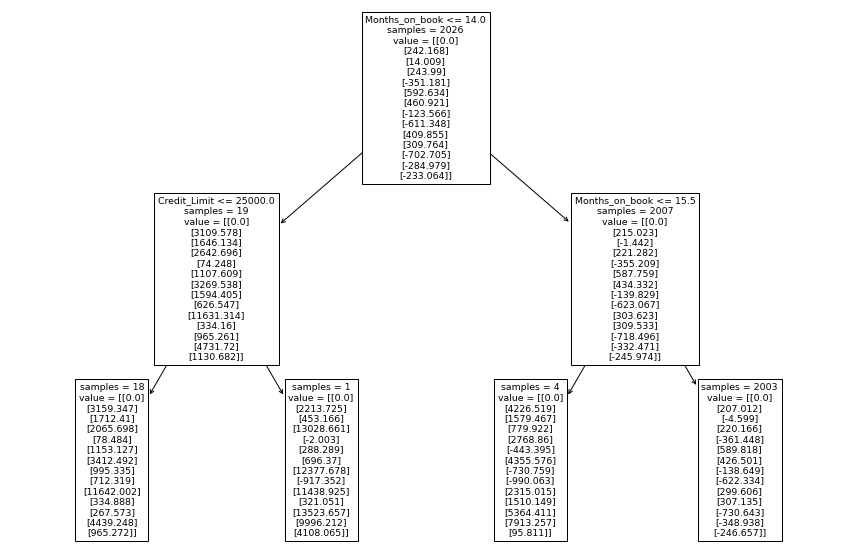

In [12]:
pi=why.policy_interpreter(test_data,  max_depth=2)

plt.figure(figsize=(15, 10), )
pi.plot()

In [13]:
print(pi.interpret()['sample_0'])

decision node 0: (covariate [0, 5] = 31.0) > 14.0 
decision node 4: (covariate [0, 5] = 31.0) > 15.5 
The recommended policy is treatment 5 with value 589.8184567845782


# Scoring estimators

In [14]:
why.score(test_data)

06-28 19:11:14 I ylearn._why.py 961 - fit scorer for Gender with RLoss
06-28 19:11:14 I ylearn.e.double_ml.py 686 - _fit_1st_stage: fitting x_model RandomForestClassifier
06-28 19:11:14 I ylearn.e.double_ml.py 691 - _fit_1st_stage: fitting y_model RandomForestRegressor
06-28 19:11:15 I ylearn.e.effect_score.py 373 - Calculating the score: PermutedTLearner(model=None, args=None, kwargs=None) finished estimating.
06-28 19:11:15 I ylearn.e.effect_score.py 377 - using combined treat technique for discrete treatment.
06-28 19:11:15 I ylearn._why.py 961 - fit scorer for Education_Level with RLoss
06-28 19:11:15 I ylearn.e.double_ml.py 686 - _fit_1st_stage: fitting x_model RandomForestClassifier
06-28 19:11:15 I ylearn.e.double_ml.py 691 - _fit_1st_stage: fitting y_model RandomForestRegressor
06-28 19:11:16 I ylearn.e.effect_score.py 373 - Calculating the score: PermutedTLearner(model=None, args=None, kwargs=None) finished estimating.
06-28 19:11:16 I ylearn.e.effect_score.py 377 - using comb

13487885.155435078

# Learn Why with causal discovery

## Fit Why

In [15]:
why=Why(identifier='discovery',random_state=123)
why.fit(train_data,outcome )

06-28 19:11:16 I ylearn._why.py 451 - infer outcome as regression
06-28 19:11:16 I ylearn._why.py 461 - identify treatment, adjustment, covariate and instrument
06-28 19:11:16 I ylearn._why.py 242 - discovery causation
06-28 19:11:28 I ylearn._why.py 575 - identified treatment[classification]: ['Dependent_count', 'Gender']
06-28 19:11:28 I ylearn._why.py 587 - infer discrete_treatment=True
06-28 19:11:28 I ylearn._why.py 310 - Not found covariate by discovery, so setup it by default
06-28 19:11:28 I ylearn._why.py 602 - identified adjustment: None
06-28 19:11:28 I ylearn._why.py 603 - identified covariate: ['Education_Level', 'Card_Category']
06-28 19:11:28 I ylearn._why.py 604 - identified instrument: ['Months_on_book', 'Marital_Status', 'Customer_Age', 'Credit_Limit', 'Income_Category']
06-28 19:11:28 I ylearn._why.py 470 - encode treatment ...
06-28 19:11:28 I ylearn._why.py 480 - preprocess data ...
06-28 19:11:28 I ylearn._why.py 498 - fit estimator for Dependent_count with NP2SLS

Why(discrete_outcome=False, discrete_treatment=True, identifier='discovery', random_state=123)

# Inspect causal effect

In [17]:
# why.causal_effect()

# Learn Why with cusomized treatments

## Fit Why

In [18]:
why=Why(random_state=123)
# why.fit(train_data,outcome,treatment=['Card_Category' ,'Credit_Limit', ] )
why.fit(train_data,outcome,treatment=['Card_Category' ,'Gender', ] )

06-28 19:15:56 I ylearn._why.py 451 - infer outcome as regression
06-28 19:15:56 I ylearn._why.py 461 - identify treatment, adjustment, covariate and instrument
06-28 19:15:56 I ylearn._why.py 587 - infer discrete_treatment=True
06-28 19:15:56 I ylearn._why.py 602 - identified adjustment: None
06-28 19:15:56 I ylearn._why.py 603 - identified covariate: ['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Months_on_book', 'Credit_Limit']
06-28 19:15:56 I ylearn._why.py 604 - identified instrument: None
06-28 19:15:56 I ylearn._why.py 470 - encode treatment ...
06-28 19:15:56 I ylearn._why.py 480 - preprocess data ...
06-28 19:15:56 I ylearn._why.py 498 - fit estimator for Card_Category with PermutedTLearner(model=None, args=None, kwargs=None)
06-28 19:16:09 I ylearn._why.py 498 - fit estimator for Gender with PermutedTLearner(model=None, args=None, kwargs=None)
06-28 19:16:11 I ylearn._why.py 498 - fit estimator for ('Card_Category', 'Gender') wit

Why(discrete_outcome=False, discrete_treatment=True, random_state=123)

# Inspect causal effect

In [19]:
why.causal_effect()

mean           min           max  \
Card_Category Gold vs Blue      3127.277074 -15708.828174  15245.511548   
              Platinum vs Blue  4100.328360 -14921.423415  14786.536698   
              Silver vs Blue    5725.189927 -15948.329411  15657.646184   
Gender        M vs F            -209.205664 -15938.573255  15657.587484   

                                        std  
Card_Category Gold vs Blue      5564.262420  
              Platinum vs Blue  5403.765198  
              Silver vs Blue    5875.117198  
Gender        M vs F            4953.646553

In [20]:
why.causal_effect(test_data)

mean           min           max  \
Card_Category Gold vs Blue      2830.118618 -13894.040599  14912.369736   
              Platinum vs Blue  3557.861537 -14844.105664  15535.335545   
              Silver vs Blue    5537.755364 -15167.314943  15163.554131   
Gender        M vs F            -149.661409 -15549.583588  15189.053656   

                                        std  
Card_Category Gold vs Blue      5690.019665  
              Platinum vs Blue  5507.693497  
              Silver vs Blue    5890.855574  
Gender        M vs F            5029.221097

In [21]:
why.individual_causal_effect(test_data.head(5))

effect
4697 Card_Category Blue vs Blue      0.000000
     Gender        F vs F            0.000000
1377 Card_Category Blue vs Blue      0.000000
     Gender        M vs F        -1903.634546
3679 Card_Category Blue vs Blue      0.000000
     Gender        M vs F       -12518.349874
5462 Card_Category Blue vs Blue      0.000000
     Gender        F vs F            0.000000
884  Card_Category Blue vs Blue      0.000000
     Gender        M vs F         2078.378941

# WhatIf

## Prepare data

Select customers with Blue card and credit limit over 3000 as test data.

In [22]:
whatif_data= test_data[lambda df: df['Card_Category']=='Blue' ][lambda df: df['Credit_Limit']>=10000]
whatif_data

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Trans_Amt
4697,38,F,2,Uneducated,Single,$40K - $60K,Blue,31,12000,3831
1377,38,M,2,Graduate,Single,$40K - $60K,Blue,24,14000,1399
3679,47,M,3,Uneducated,Single,$80K - $120K,Blue,36,26000,3489
5502,43,M,3,Unknown,Divorced,$80K - $120K,Blue,36,12000,3902
3232,38,M,2,College,Single,$40K - $60K,Blue,20,10000,3812
...,...,...,...,...,...,...,...,...,...,...
4453,52,F,3,Graduate,Unknown,$40K - $60K,Blue,45,10000,3987
34,58,M,0,Graduate,Married,$80K - $120K,Blue,49,12000,1291
2952,26,M,0,Graduate,Divorced,Unknown,Blue,36,20000,2309
2906,54,M,2,Post-Graduate,Single,$60K - $80K,Blue,38,14000,3982


What happens if we change customer's blue card to sliver card? 

Selected customers: 420
Mean "Total_Trans_Amt" with Blue card:	4535.088
Mean "Total_Trans_Amt" if Silver card:	6147.899


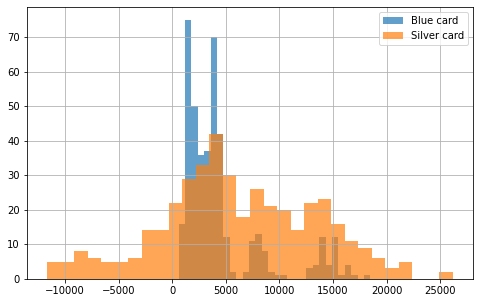

In [23]:
new_value=whatif_data['Card_Category'].map(lambda _:'Silver')
orig_out=whatif_data[outcome]
new_out=why.whatif(whatif_data,new_value,treatment='Card_Category')



print('Selected customers:', len(whatif_data))
print(f'Mean "{outcome}" with Blue card:\t{orig_out.mean():.3f}' )
print(f'Mean "{outcome}" if Silver card:\t{new_out.mean():.3f}' )

plt.figure(figsize=(8, 5), )
orig_out.hist(label='Blue card',bins=30,alpha=0.7)
new_out.hist(label='Silver card',bins=30,alpha=0.7)
plt.legend()

In [26]:
# t= test_data[lambda df: df['Card_Category']=='Silver' ] #[lambda df: df['Credit_Limit']>3000][lambda df: df['Credit_Limit']<5000]

In [27]:
# test_data[lambda df: df['Card_Category']=='Blue' ]['Credit_Limit'].hist()